# **Credit Card Fraud Detection Model**

In [1]:
#Importing nessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [2]:
data =pd.read_csv('/content/creditcard (1).csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 	**Exploratory Data Analysis (EDA)**

In [6]:
#Checking for Null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Finding the distribution of class
print(data['Class'].value_counts())


print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

0    284315
1       492
Name: Class, dtype: int64
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

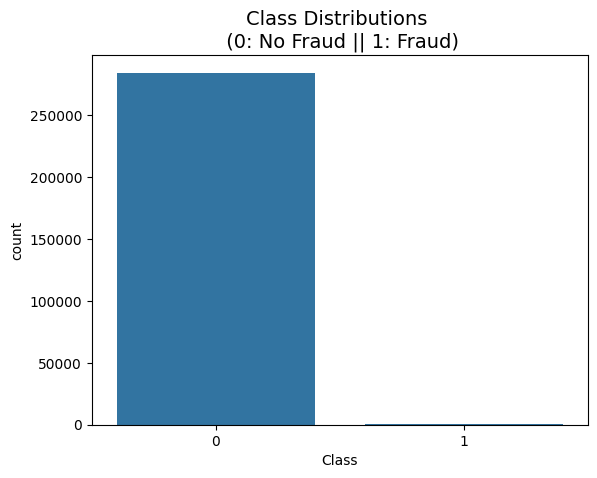

In [8]:
sns.countplot(x='Class',data = data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [9]:
# Separating the Fraud & Non Fraud transaction

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [10]:
# How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

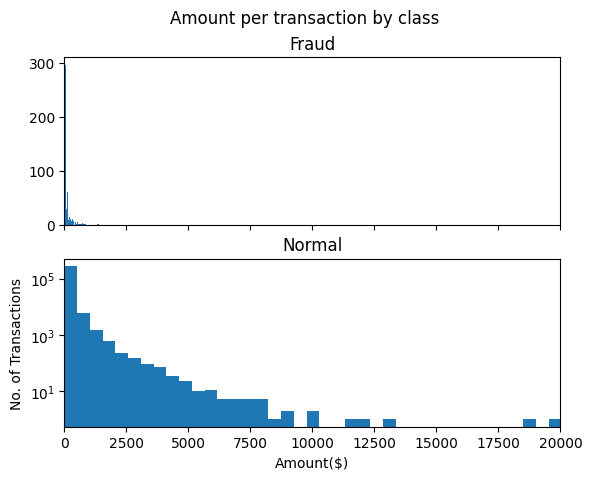

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount($)')
plt.ylabel('No. of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

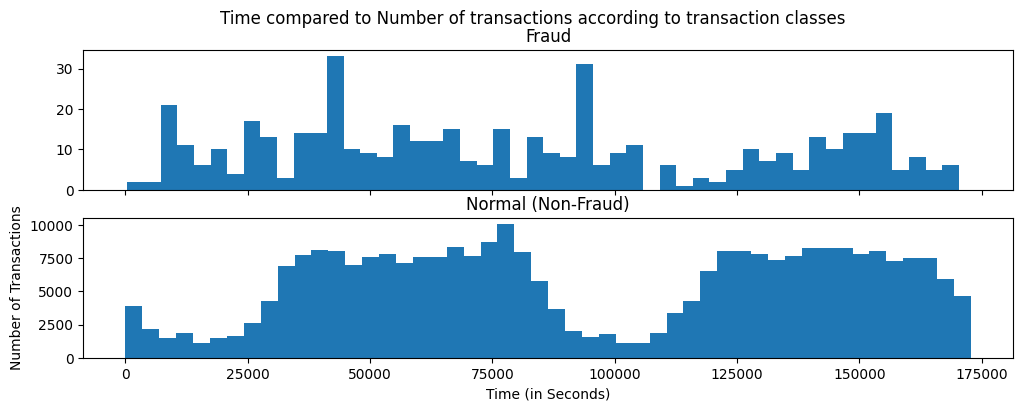

In [13]:
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
fig.suptitle('Time compared to Number of transactions according to transaction classes')
bins = 50
axis_1.hist(data.Time[data.Class == 1], bins = bins)
axis_1.set_title('Fraud')
axis_2.hist(data.Time[data.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

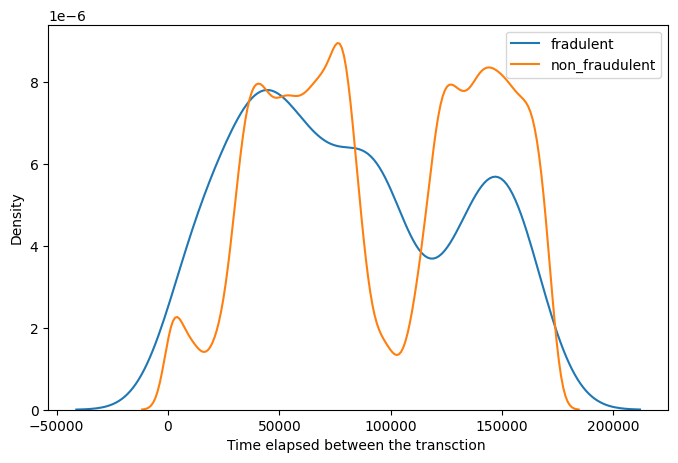

In [14]:
# Comparing the time for both classes of transsaction
plt.figure(figsize=(8, 5))
ax = sns.distplot(fraud['Time'], label='fradulent', hist=False)
ax = sns.distplot(normal['Time'], label='non_fraudulent', hist=False)
ax.set(xlabel='Time elapsed between the transction ')
plt.legend(loc='best')
plt.show()

<Axes: >

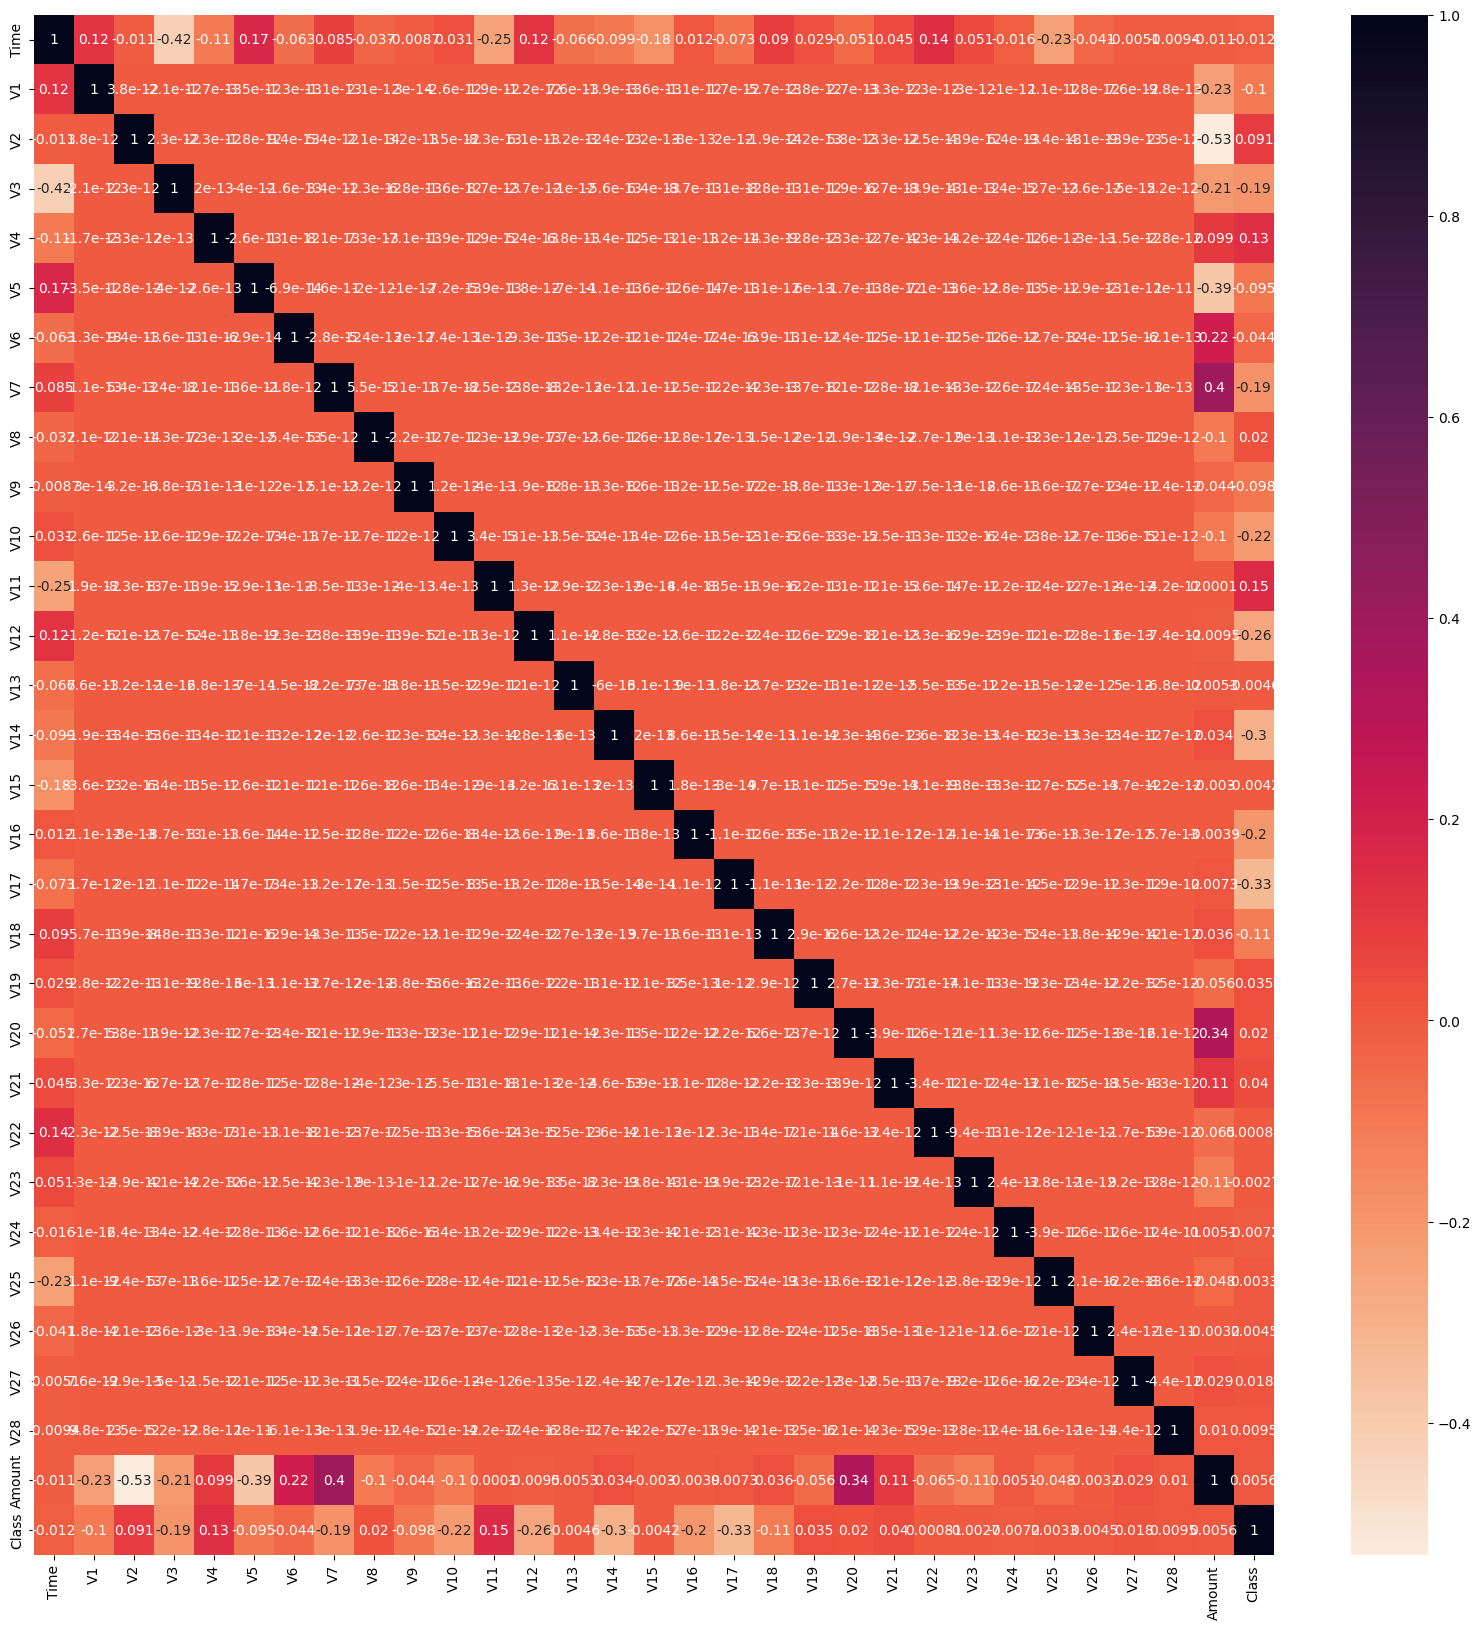

In [15]:
# plotting correlations on a heatmap

corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='rocket_r')

# **Standard Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))
data['Time']=sc.fit_transform(pd.DataFrame(data['Time']))


# **Input Split**

In [17]:
X = data.drop('Class',axis=1)
y = data['Class']




In [18]:
X.shape

(284807, 30)

In [19]:
y.shape

(284807,)

In [20]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# **Checking For Skewness**

In [21]:
cols = X.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

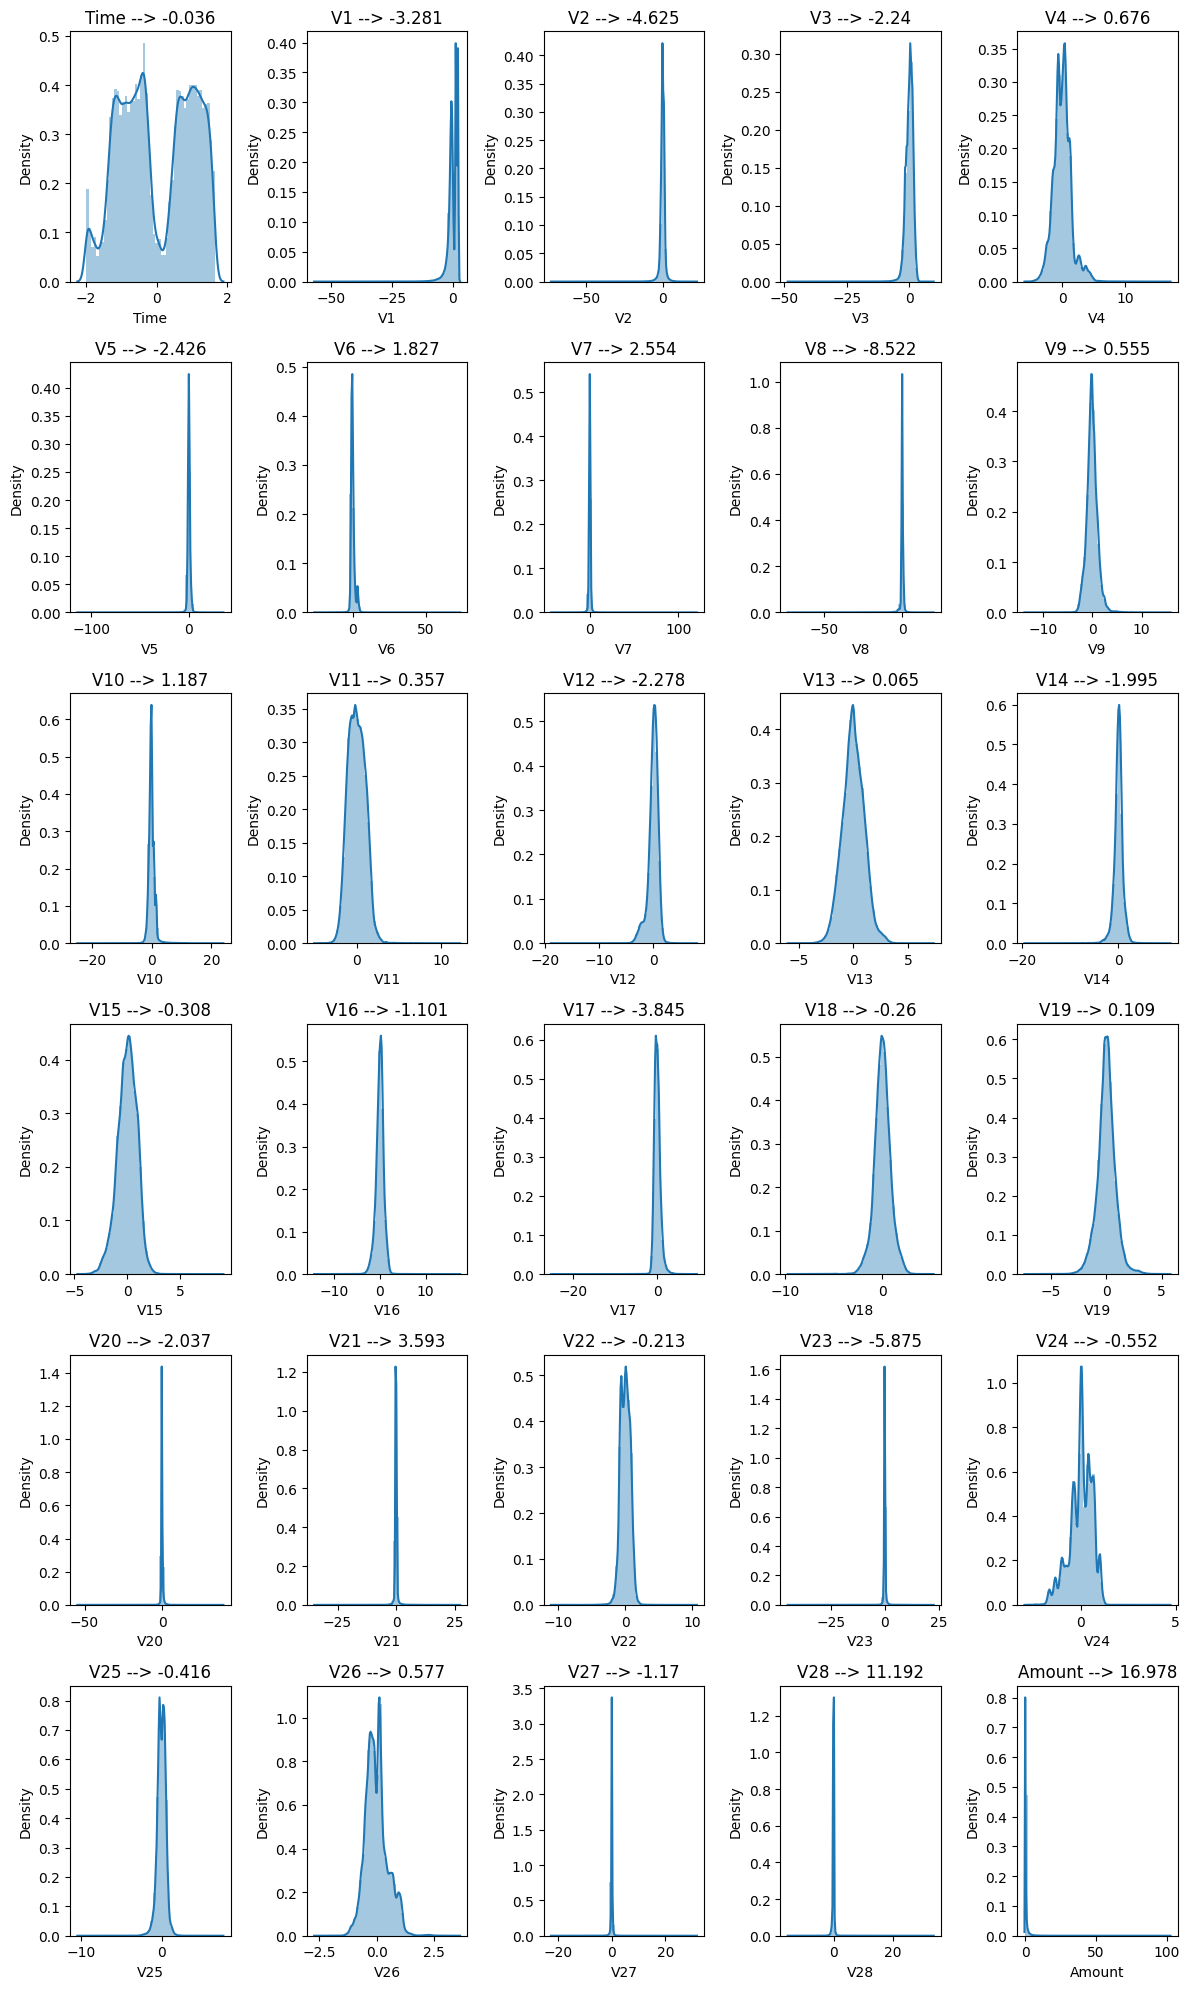

In [22]:
k=0
plt.figure(figsize=(12, 20))
for col in cols:
  k=k+1
  plt.subplot(6, 5, k)
  sns.distplot(X[col])
  plt.tight_layout()
  plt.title(col + ' --> ' + str(round(X[col].skew(), 3)))


In [23]:
# Handling Skewness with Power Transformer
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X[cols] = pt.fit_transform(X)






# **Train test split**

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42,stratify=y)

# **Balancing the Data by Oversampling using SMOTE**

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
X_rs,y_rs = SMOTE().fit_resample(X_train,y_train)

In [27]:
y_rs.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

# **Model Training**

In [28]:
# Creating KFold object with 5 splits
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits=5, shuffle=True, random_state=4)

In [29]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

In [30]:
from sklearn.linear_model import LogisticRegression
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

In [31]:
# Fit the model
model_cv.fit(X_rs, y_rs)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [32]:
print(model_cv.best_score_)
print(model_cv.best_params_['C'])

0.9915715940083141
1000


In [33]:
# Hyperparameter Tunning
# Tunning model with best C
lr = LogisticRegression(C=1000)


In [34]:
logistic_model = lr.fit(X_rs, y_rs)

In [35]:
# Predictions on the test set
y_test_pred = logistic_model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score

In [37]:
print("Accuracy:-", accuracy_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_pred))

Accuracy:- 0.9709630982058214
ROC AUC: 0.9396172966935791


<Axes: >

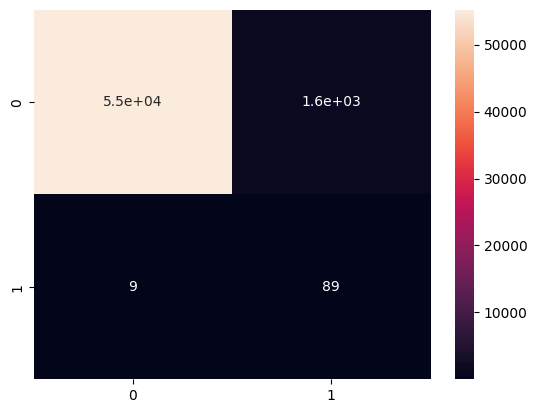

In [38]:
confusion=confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True)


In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [40]:
# Predictions on the train set
y_train_pred = logistic_model.predict(X_rs)

In [41]:
print("Accuracy:-", accuracy_score(y_rs, y_train_pred))
print("ROC AUC:", roc_auc_score(y_rs, y_train_pred))

Accuracy:- 0.9535064695253044
ROC AUC: 0.9535064695253045


<Axes: >

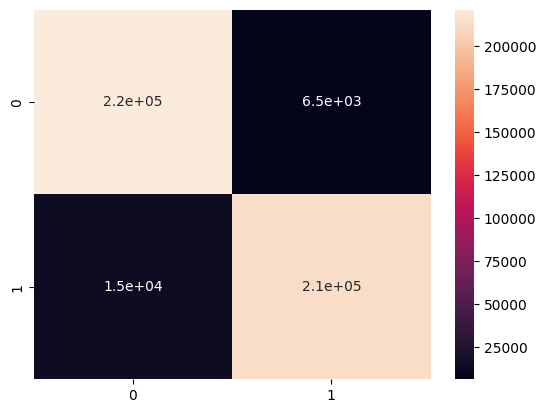

In [42]:
confusion1=confusion_matrix(y_rs, y_train_pred)
sns.heatmap(confusion1, annot=True)

In [43]:
print(classification_report(y_rs, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95    227451
           1       0.97      0.94      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



The models performed well with Logistic regression  and has ROC score 0.95 in the train set and 0.94 on the test set.And accuracy of 95% and 97% respectively.





# **Saving the model**

In [86]:
import pickle

In [88]:
file_name='credit_cardModel'
pickle.dump(logistic_model,open(file_name,'wb'))

In [90]:
loaded_model=pickle.load(open(file_name,'rb'))

In [91]:
loaded_model.predict([X_test])

array([0, 0, 0, ..., 0, 0, 0])